In [1]:
import mdtraj as md
import numpy as np
from tqdm import tqdm
import sys
import os
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from  scipy.stats import t

sys.path.append("..")  # Avoid error with importing of src
from src.utils_py.profile_approx import _profile_approx_alpha_from_array
# from src.utils_py.stat_ineff import get_statistical_inefficiency_RCA
from src.utils_py.angle_blocks import get_angle_blocks
from src.utils_py.utils import get_each_density_profile

cmap = matplotlib.colormaps['tab10']

---

In [2]:
trajectory_file = '/home/fluffymelon/PANDA_exp/scaling/calcite_decane_tip4p_sc_2.5/cal_dec_tip4p.xtc'
topology_file = '/home/fluffymelon/PANDA_exp/scaling/calcite_decane_tip4p_sc_2.5/cal_dec_tip4p.gro'
residue = 'DECAN'
H = 9
l, phi = 18.004 / H, 0.5
rho_bulk = 3.0896 * 10
interface_type = 'roll'
sl=200
block_lenght=1_000
begin_time=0
time=40_000
timestep=2
units=1
display=False


axises_2_5, denses_2_5, angles_2_5 = get_each_density_profiles_and_angles(
    trajectory_file,
    topology_file,
    rho_bulk,
    l,
    phi,
    H,
    'roll',
    'DECAN',
    200,
    block_lenght,
    begin_time,
    time,
    timestep,
    display=display
)


00%|███████████████████████████████████████████████████████████████████████████| 40/40 [05:25<00:00,  8.14s/it]

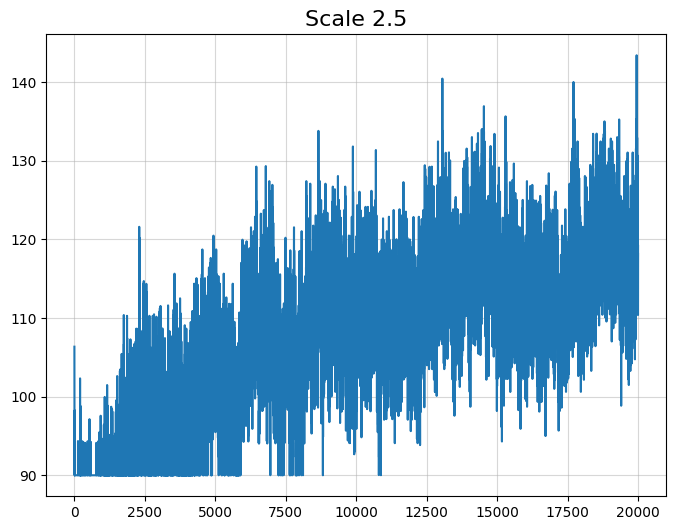

In [7]:
plt.figure(figsize=(8, 6))
plt.grid(alpha=0.5)

plt.plot(angles_2_5)

plt.title('Scale 2.5', fontsize=16)
plt.show()

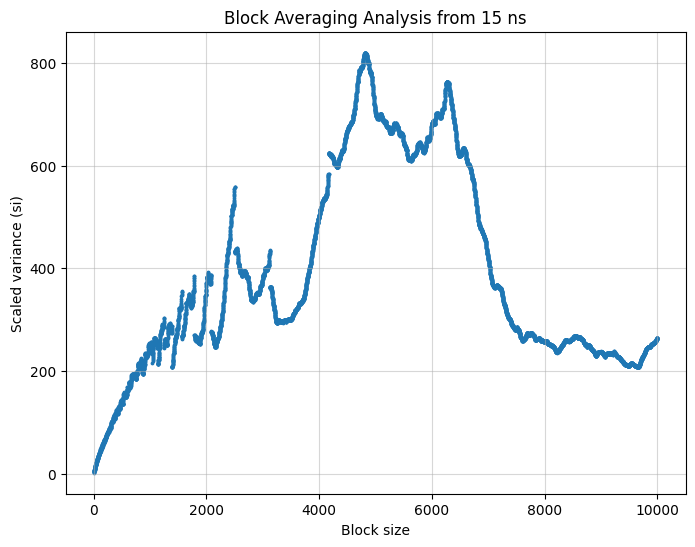

In [20]:
# Input array
begin = 15_000 // timestep
x = angles_2_5[begin:]

# Compute variance, mean, and length
v = np.var(x, ddof=1)  # ddof=1 for sample variance (like in R)
m = np.mean(x)
n = len(x)

si = []  # List to store the scaled variances
for t in range(2, 10001):  # Equivalent to seq(2, 1000)
    nblocks = n // t  # Number of blocks
    if nblocks > 0:
        # Create blocks of size `t`
        xg = np.split(x[:nblocks * t], nblocks)
        # Calculate mean of each block
        block_means = np.array([np.mean(block) for block in xg])
        # Variance of the block means
        v2 = np.sum((block_means - m) ** 2) / nblocks
        # Compute scaled variance and append
        si.append(t * v2 / v)
    else:
        break

# Plot the result
plt.figure(figsize=(8, 6))
plt.grid(alpha=0.5)

plt.scatter(range(2, 2 + len(si)), si, s=3)

plt.xlabel('Block size')
plt.ylabel('Scaled variance (si)')
plt.title('Block Averaging Analysis from 15 ns')

plt.show()


In [22]:
block_lenght = 2000

angles_2_5_trunc = []
for i in tqdm(range(len(denses_2_5)%block_lenght, len(denses_2_5), block_lenght)):
    mean_dens = np.mean(denses_2_5[i:i+block_lenght, :], axis=0)
    mean_axis = np.mean(axises_2_5[i:i+block_lenght, :], axis=0)

    _, _, best_i = _profile_approx_alpha_from_array(
        mean_dens, mean_axis, rho_bulk, l, phi, H, interface_type, display
    )

    angles_2_5_trunc.append(np.rad2deg(best_i['theta']))

angles_2_5_trunc = np.array(angles_2_5_trunc)


00%|██████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 153.87it/s]

---

In [64]:
trajectory_file = '/home/fluffymelon/PANDA_exp/scaling/calcite_decane_tip4p_sc_2.5_offset/cal_dec_tip4p.xtc'
topology_file = '/home/fluffymelon/PANDA_exp/scaling/calcite_decane_tip4p_sc_2.5_offset/cal_dec_tip4p.gro'
residue = 'DECAN'
H = 9
l, phi = 18.004 / H, 0.5
rho_bulk = 3.0896 * 10
interface_type = 'roll'
sl=200
block_lenght=1_000
begin_time=1_000
time=40_000
timestep=2
units=1
display=False


axises_2_5_offset, denses_2_5_offset, angles_2_5_offset = get_each_density_profiles_and_angles(
    trajectory_file,
    topology_file,
    rho_bulk,
    l,
    phi,
    H,
    'roll',
    'DECAN',
    200,
    block_lenght,
    begin_time,
    time,
    timestep,
    display=display
)

NameError: name 'get_each_density_profiles_and_angles' is not defined

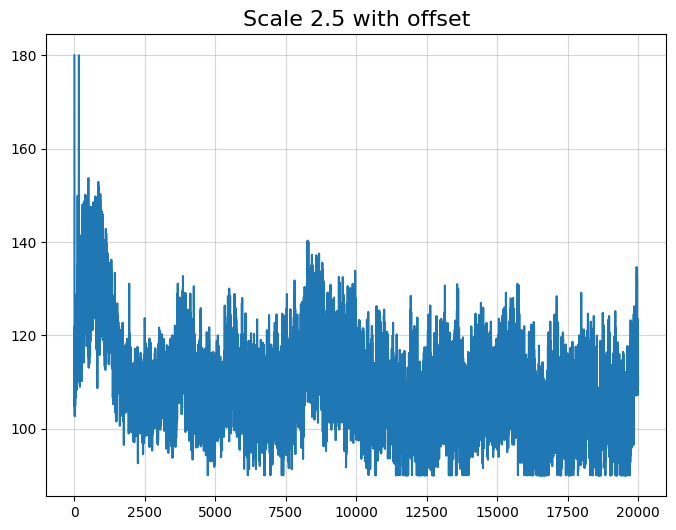

In [8]:
plt.figure(figsize=(8, 6))
plt.grid(alpha=0.5)

plt.plot(angles_2_5_offset)

plt.title('Scale 2.5 with offset', fontsize=16)
plt.show()

In [3]:
trajectory_file = '/home/fluffymelon/PANDA_exp/scaling/production/calcite_decane_tip4p_sc_1.6_offset_0.2/cal_dec_tip4p.xtc'
topology_file = '/home/fluffymelon/PANDA_exp/scaling/production/calcite_decane_tip4p_sc_1.6_offset_0.2/cal_dec_tip4p.gro'
residue = 'DECAN'
H = 9
l, phi = 18.004 / H, 0.5
rho_bulk = 3.0896 * 10
interface_type = 'roll'
sl=200
chunk_length=1_000
begin_time=0
time=40_000
timestep=2
units=1
display=False


axises_2_5_offset, denses_2_5_offset = get_each_density_profile(
    trajectory_file,
    topology_file,
    'DECAN',
    200,
    chunk_length,
    begin_time,
    time,
    timestep
)

Chunk: 100%|██████████| 40/40 [03:18<00:00,  4.96s/it]


In [4]:
angles_2_5_offset = []
for i in tqdm(range(len(denses_2_5_offset))):
    _, _, best_i = _profile_approx_alpha_from_array(
        denses_2_5_offset[i, :], axises_2_5_offset[i, :], rho_bulk, l, phi, H, interface_type, display
    )

    angles_2_5_offset.append(np.rad2deg(best_i["theta"]))

angles_2_5_offset = np.array(angles_2_5_offset)

100%|██████████| 20000/20000 [03:10<00:00, 104.96it/s]


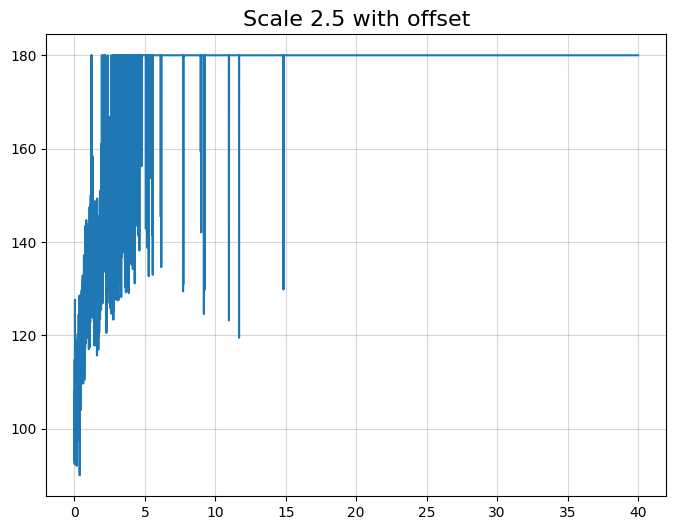

In [5]:
plt.figure(figsize=(8, 6))
plt.grid(alpha=0.5)

times = np.array(range(begin_time, time, timestep), dtype=int) / 1000
plt.plot(times, angles_2_5_offset)

plt.title('Scale 2.5 with offset', fontsize=16)
plt.show()

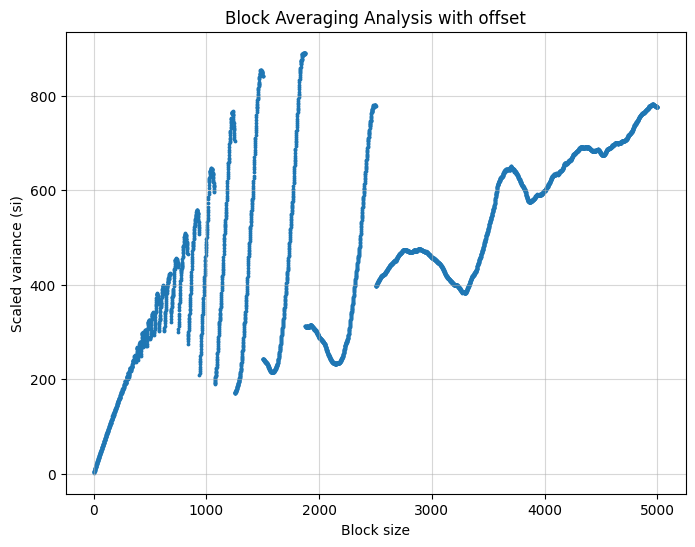

In [88]:
# Input array
begin = 15_000 // timestep
x = angles_2_5_offset[begin::-1]

# Compute variance, mean, and length
v = np.var(x, ddof=1)  # ddof=1 for sample variance (like in R)
m = np.mean(x)
n = len(x)

si = []  # List to store the scaled variances
for t in range(2, 5001):  # Equivalent to seq(2, 1000)
    nblocks = n // t  # Number of blocks
    if nblocks > 0:
        # Create blocks of size `t`
        # begin = len(x) - nblocks * t
        xg = np.split(x[:nblocks * t], nblocks)
        # xg = np.split(x[begin:], nblocks)
        # Calculate mean of each block
        block_means = np.array([np.mean(block) for block in xg])
        # Variance of the block means
        v2 = np.sum((block_means - m) ** 2) / nblocks
        # Compute scaled variance and append
        si.append(t * v2 / v)
    else:
        break

si = np.array(si)

# Plot the result
plt.figure(figsize=(8, 6))
plt.grid(alpha=0.5)

plt.scatter(range(2, 2 + len(si)), si, s=3)

plt.xlabel('Block size')
plt.ylabel('Scaled variance (si)')
plt.title('Block Averaging Analysis with offset')

plt.show()

In [84]:
def func(x, a, b):
    return a * np.exp(-b * x) + a
x = np.linspace(0,4,50)
y = func(x, 2.5, 1.3, 0.5)
yn = y + 0.2*np.random.normal(size=len(x))
popt, pcov = curve_fit(func, x, yn)

TypeError: func() takes 3 positional arguments but 4 were given

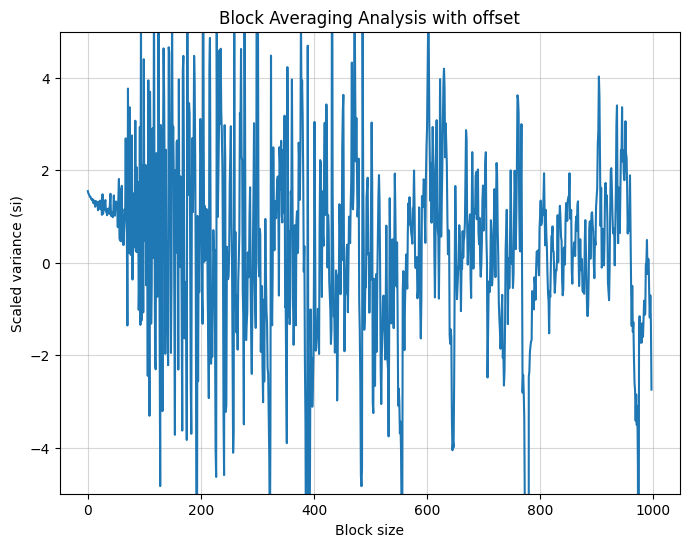

In [59]:
plt.figure(figsize=(8, 6))
plt.grid(alpha=0.5)

n = 5
mean_si = np.mean(np.reshape(si[:(len(si) - len(si) % n)], (len(si) // n, n)), axis=1)
deriv = (mean_si[1:] - mean_si[:-1]) / 2
# mean_deriv = np.mean(np.reshape(deriv[:(len(deriv) - len(deriv) % n)], (len(deriv) // n, n)), axis=1)
plt.plot(deriv)

plt.ylim(-5, 5)
plt.xlabel('Block size')
plt.ylabel('Scaled variance (si)')
plt.title('Block Averaging Analysis with offset')

plt.show()

In [23]:
block_lenght = 2000

angles_2_5_offset_trunc = []
for i in tqdm(range(len(denses_2_5_offset)%block_lenght, len(denses_2_5_offset), block_lenght)):
    mean_dens = np.mean(denses_2_5_offset[i:i+block_lenght, :], axis=0)
    mean_axis = np.mean(axises_2_5_offset[i:i+block_lenght, :], axis=0)

    _, _, best_i = _profile_approx_alpha_from_array(
        mean_dens, mean_axis, rho_bulk, l, phi, H, interface_type, display
    )

    angles_2_5_offset_trunc.append(np.rad2deg(best_i['theta']))

angles_2_5_offset_trunc = np.array(angles_2_5_offset_trunc)


00%|██████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 113.31it/s]

---

In [27]:
angles_2_5_offset_trunc.shape

(10,)

In [29]:
len(range(0, 40_000, 4_000))

10

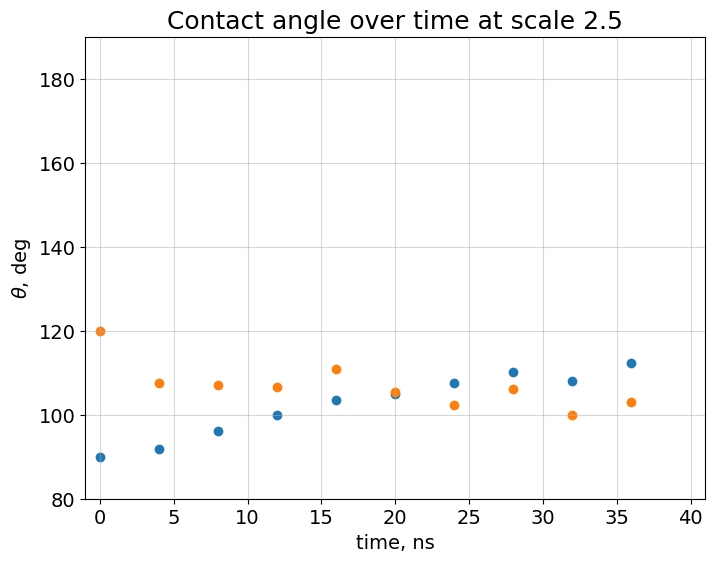

In [38]:
plt.figure(figsize=(8, 6))
plt.grid(alpha=0.5)

plt.scatter(range(0, 40, 4), angles_2_5_trunc, label='initial')
plt.scatter(range(0, 40, 4), angles_2_5_offset_trunc, label='offset')

plt.title(f'Contact angle over time at scale 2.5', fontsize=18)
plt.xlim(-1, 41)
plt.ylim(80, 190)
plt.xlabel('time, ns', fontsize=14)
plt.ylabel(r'$\theta$, deg', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', fontsize=14)

plt.show()

---

In [ ]:
args = {
    "trajectory_file": '/home/fluffymelon/PANDA_exp/scaling/calcite_decane_tip4p_sc_2.5_offset/cal_dec_tip4p.xtc',
    "topology_file": '/home/fluffymelon/PANDA_exp/scaling/calcite_decane_tip4p_sc_2.5_offset/cal_dec_tip4p.gro',
    "residue": 'DECAN',
    "H": 9,
    "l": 18.004 / 9,
    "phi": 0.5,
    "rho_bulk": 3.0896 * 10,
    "interface_type": 'roll',
    "sl": 200,
    "chunk_length": 1_000,
    "begin_time": 1_000,
    "time": 40_000,
    "timestep": 2,
    "max_block_length": 10_000,
    "units": 'ps',
    "display": False,
}

block_sizes, si = get_statistical_inefficiency_RCA(**args)

Calculating all density profiles



hunk: 100%|████████████████████████████████████████████████████████████████████| 39/39 [02:24<00:00,  3.71s/it]

Calculating contact angles



00%|████████████████████████████████████████████████████████████████████| 19500/19500 [01:52<00:00, 173.26it/s]

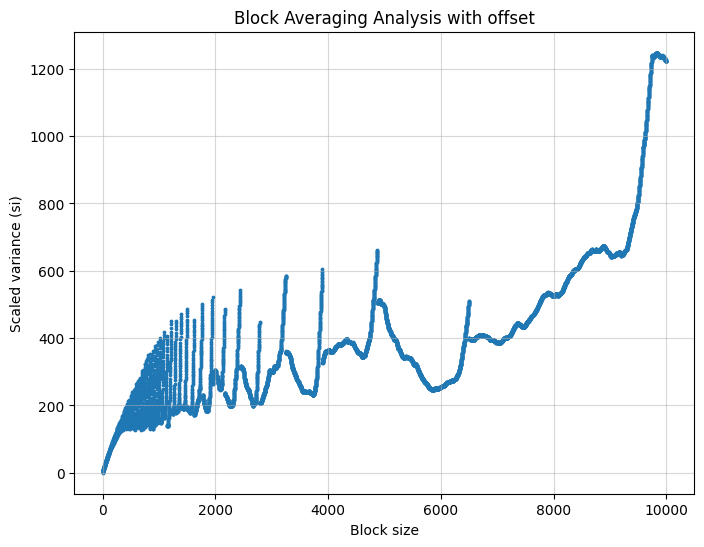

In [63]:
plt.figure(figsize=(8, 6))
plt.grid(alpha=0.5)

plt.scatter(block_sizes, si, s=3)

plt.xlabel('Block size')
plt.ylabel('Scaled variance (si)')
plt.title('Block Averaging Analysis with offset')

plt.show()

---

In [9]:
np.deg2rad(0.1)

0.0017453292519943296

In [ ]:
args = {
    "trajectory_file": '/home/fluffymelon/PANDA_exp/scaling/calcite_decane_tip4p_sc_2.0_offset/cal_dec_tip4p.xtc',
    "topology_file": '/home/fluffymelon/PANDA_exp/scaling/calcite_decane_tip4p_sc_2.0_offset/cal_dec_tip4p.gro',
    "residue": 'DECAN',
    "H": 9,
    "l": 18.004 / 9,
    "phi": 0.5,
    "rho_bulk": 3.0896 * 10,
    "interface_type": 'roll',
    "sl": 200,
    "block_length": 4_000,
    "begin_time": 0,
    "time": 40_000,
    "timestep": 2,
    "units": 'ps',
    "display": False,
}

time_2_0_offset_0_5, angles_2_0_offset_0_5 = get_angle_blocks(**args)


hunk: 100%|████████████████████████████████████████████████████████████████████| 10/10 [02:12<00:00, 13.23s/it]

In [ ]:
args = {
    "trajectory_file": '/home/fluffymelon/PANDA_exp/scaling/calcite_decane_tip4p_sc_2.0_offset_0.2/cal_dec_tip4p.xtc',
    "topology_file": '/home/fluffymelon/PANDA_exp/scaling/calcite_decane_tip4p_sc_2.0_offset_0.2/cal_dec_tip4p.gro',
    "residue": 'DECAN',
    "H": 9,
    "l": 18.004 / 9,
    "phi": 0.5,
    "rho_bulk": 3.0896 * 10,
    "interface_type": 'roll',
    "sl": 200,
    "block_length": 4_000,
    "begin_time": 0,
    "time": 40_000,
    "timestep": 2,
    "units": 'ps',
    "display": False,
}

time_2_0_offset_0_2, angles_2_0_offset_0_2 = get_angle_blocks(**args)


hunk: 100%|████████████████████████████████████████████████████████████████████| 10/10 [02:32<00:00, 15.29s/it]

In [ ]:
args = {
    "trajectory_file": '/home/fluffymelon/PANDA_exp/scaling/calcite_decane_tip4p_sc_2.0/cal_dec_tip4p.xtc',
    "topology_file": '/home/fluffymelon/PANDA_exp/scaling/calcite_decane_tip4p_sc_2.0/cal_dec_tip4p.gro',
    "residue": 'DECAN',
    "H": 9,
    "l": 18.004 / 9,
    "phi": 0.5,
    "rho_bulk": 3.0896 * 10,
    "interface_type": 'roll',
    "sl": 200,
    "block_length": 4_000,
    "begin_time": 0,
    "time": 40_000,
    "timestep": 2,
    "units": 'ps',
    "display": False,
}

time_2_0, angles_2_0 = get_angle_blocks(**args)


hunk: 100%|████████████████████████████████████████████████████████████████████| 10/10 [04:37<00:00, 27.74s/it]

In [10]:
plt.figure(figsize=(8, 6))
plt.grid(alpha=0.5)

s = 50

begin1 = 1
mean1 = np.mean(angles_2_5_offset_0_5[begin1:])
std1 = np.std(angles_2_5_offset_0_5[begin1:])
plt.scatter(time_2_5_offset_0_5 / 1_000, angles_2_5_offset_0_5, s=s, color=cmap(1), label="offset: {:.1f}; angle {:.2f}±{:.2f}".format(0.5, mean1, std1))
plt.hlines(np.mean(angles_2_5_offset_0_5[begin1:]), 0, 40, color=cmap(1))
plt.fill_between([0, 40], np.array([1, 1]) * (mean1 - std1), np.array([1, 1]) * (mean1 + std1), , color=cmap(1))

begin2 = 0
mean2 = np.mean(angles_2_5_offset_0_2[begin2:])
std2 = np.std(angles_2_5_offset_0_2[begin2:])
plt.scatter(time_2_5_offset_0_2 / 1_000, angles_2_5_offset_0_2, s=s, color=cmap(2), label="offset: {:.1f}; angle {:.2f}±{:.2f}".format(0.2, mean2, std2))
plt.hlines(np.mean(angles_2_5_offset_0_2[begin2:]), 0, 40, color=cmap(2))

begin3 = 5
mean3 = np.mean(angles_2_5[begin3:])
std3 = np.std(angles_2_5[begin3:])
plt.scatter(time_2_5 / 1_000, angles_2_5, s=s, color=cmap(3), label="offset: {:.1f}; angle {:.2f}±{:.2f}".format(0, mean3, std3))
plt.hlines(np.mean(angles_2_5[begin3:]), 0, 40, color=cmap(3))

plt.title(f'Contact angle over time at scale 2.5', fontsize=18)
plt.xlim(-1, 41)
plt.ylim(85, 135)
plt.xlabel('time, ns', fontsize=14)
plt.ylabel(r'$\theta$, deg', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', fontsize=14)

plt.show()

SyntaxError: invalid syntax (1848633140.py, line 11)

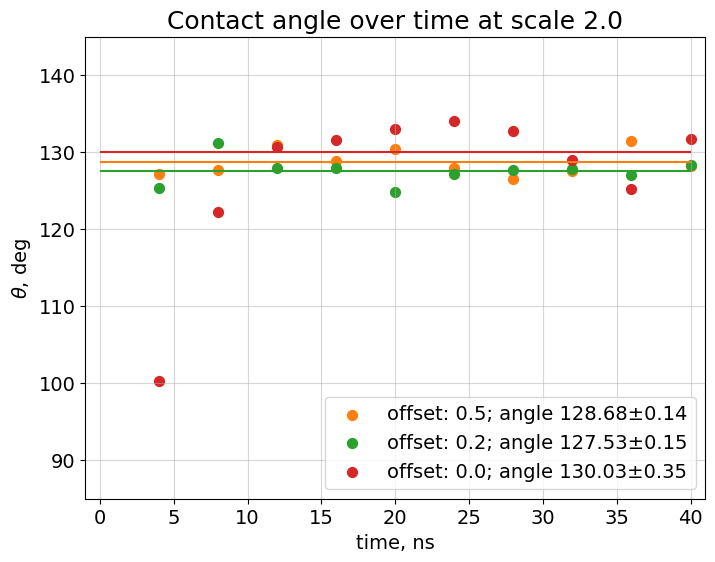

In [ ]:
plt.figure(figsize=(8, 6))
plt.grid(alpha=0.5)

s = 50

begin1 = 0
mean1 = np.mean(angles_2_0_offset_0_5[begin1:])
std1 = get_real_std(angles_2_0_offset_0_5[begin1:])
plt.scatter(time_2_0_offset_0_5 / 1_000, angles_2_0_offset_0_5, s=s, color=cmap(1), label="offset: {:.1f}; angle {:.2f}±{:.2f}".format(0.5, mean1, std1))
plt.hlines(np.mean(angles_2_0_offset_0_5[begin1:]), 0, 40, color=cmap(1))

begin2 = 0
mean2 = np.mean(angles_2_0_offset_0_2[begin2:])
std2 = get_real_std(angles_2_0_offset_0_2[begin2:])
plt.scatter(time_2_0_offset_0_2 / 1_000, angles_2_0_offset_0_2, s=s, color=cmap(2), label="offset: {:.1f}; angle {:.2f}±{:.2f}".format(0.2, mean2, std2))
plt.hlines(np.mean(angles_2_0_offset_0_2[begin2:]), 0, 40, color=cmap(2))

begin3 = 1
mean3 = np.mean(angles_2_0[begin3:])
std3 = get_real_std(angles_2_0[begin3:])
plt.scatter(time_2_0 / 1_000, angles_2_0, s=s, color=cmap(3), label="offset: {:.1f}; angle {:.2f}±{:.2f}".format(0, mean3, std3))
plt.hlines(np.mean(angles_2_0[begin3:]), 0, 40, color=cmap(3))

plt.title(f'Contact angle over time at scale 2.0', fontsize=18)
plt.xlim(-1, 41)
plt.ylim(85, 145)
plt.xlabel('time, ns', fontsize=14)
plt.ylabel(r'$\theta$, deg', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=14)

plt.show()

In [26]:
def get_real_std(x: np.array):
    a_k = t.pdf((1 + 0.80) / 2, len(x)-1)

    return np.std(x, ddof=1) * a_k / np.sqrt(len(x)-1)

---

In [7]:
args = {
    "trajectory_file": '/home/fluffymelon/PANDA_exp/scaling/production/calcite_decane_tip4p_sc_1.7_offset_0.2/cal_dec_tip4p.xtc',
    "topology_file": '/home/fluffymelon/PANDA_exp/scaling/production/calcite_decane_tip4p_sc_1.7_offset_0.2/cal_dec_tip4p.gro',
    "residue": 'DECAN',
    "H": 9,
    "l": 18.004 / 9,
    "phi": 0.5,
    "rho_bulk": 3.0896 * 10,
    "interface_type": 'roll',
    "sl": 200,
    "block_length": 4_000,
    "begin_time": 0,
    "time": 40_000,
    "timestep": 2,
    "units": 'ps',
    "display": False,
}

time, angles = get_angle_blocks(**args)

Chunk: 100%|██████████| 10/10 [02:48<00:00, 16.84s/it]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


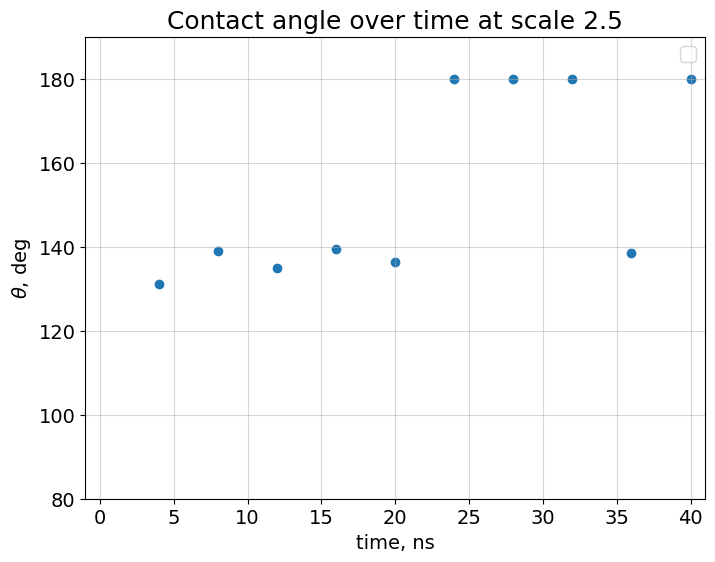

In [8]:
plt.figure(figsize=(8, 6))
plt.grid(alpha=0.5)

plt.scatter(time / 1000, angles)

plt.title(f'Contact angle over time at scale 2.5', fontsize=18)
plt.xlim(-1, 41)
plt.ylim(80, 190)
plt.xlabel('time, ns', fontsize=14)
plt.ylabel(r'$\theta$, deg', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', fontsize=14)

plt.show()